<a href="https://colab.research.google.com/github/Safahabbasi/deeplearning-project/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 27 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.2963 - loss: 0.7299 - val_accuracy: 0.6667 - val_loss: 6.8365
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step - accuracy: 0.9259 - loss: 1.2535 - val_accuracy: 0.6667 - val_loss: 6.1862
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step - accuracy: 0.9259 - loss: 1.2344 - val_accuracy: 0.6667 - val_loss: 4.3453
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9259 - loss: 0.9746 - val_accuracy: 0.6667 - val_loss: 2.8265
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step - accuracy: 0.9259 - loss: 0.2792 - val_accuracy: 0.6667 - val_loss: 1.7652
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step - accuracy: 0.9259 - loss: 0.2328 - val_accuracy: 0.6667 - val_loss: 1.0032
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9259 - loss: 0.2999 - val_accuracy: 0.6667 - val_loss: 0.7692
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9259 - loss: 0.3812 - val_accuracy: 0.6667 - val_loss: 0.8077
Epoch 9/10
1/

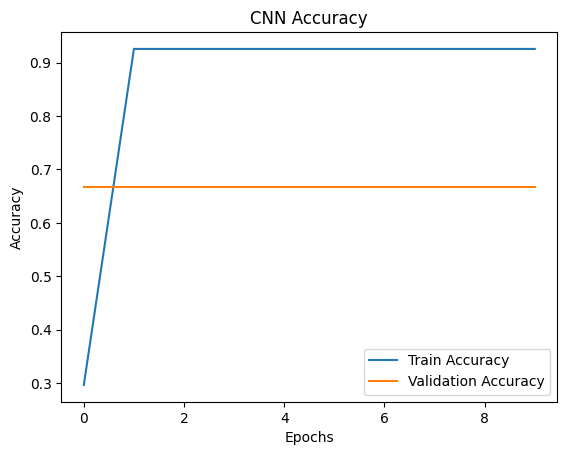

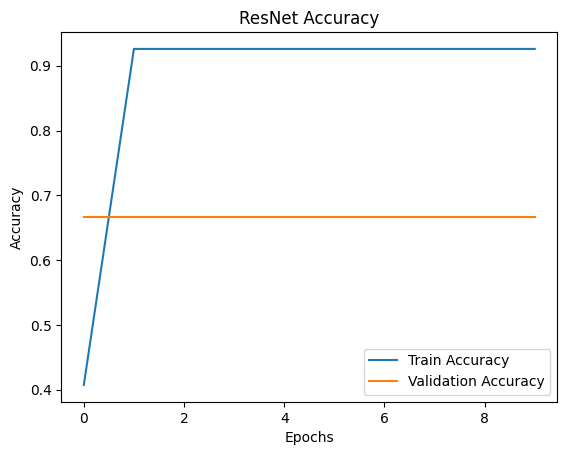

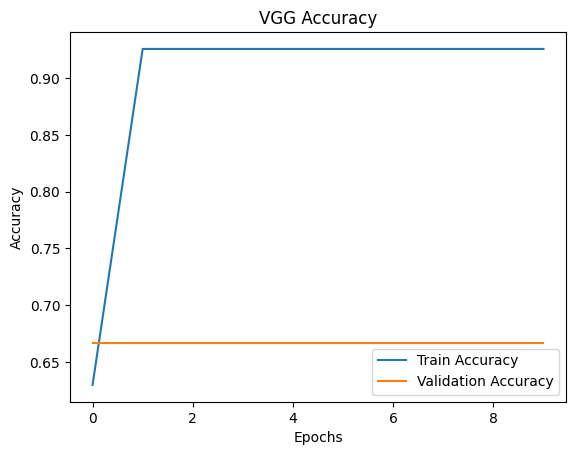

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set dataset path
dataset_path = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

# Data Augmentation and Preprocessing
data_gen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
train_data = data_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_data = data_gen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# 1. CNN Model
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()
cnn_history = cnn_model.fit(train_data, validation_data=test_data, epochs=10)

# 2. ResNet Model
def build_resnet():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

resnet_model = build_resnet()
resnet_history = resnet_model.fit(train_data, validation_data=test_data, epochs=10)

# 3. VGG Model
def build_vgg():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

vgg_model = build_vgg()
vgg_history = vgg_model.fit(train_data, validation_data=test_data, epochs=10)

# Plot Training History
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(cnn_history, 'CNN Accuracy')
plot_history(resnet_history, 'ResNet Accuracy')
plot_history(vgg_history, 'VGG Accuracy')
